# Домашнее задание к лекции «Корреляция и корреляционный анализ»

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

## Part 1. Northern and Southern cities

### EDA

In [110]:
df = pd.read_csv(r'../data/water.csv', index_col = 0)
df.head()

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18


In [111]:
df.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


In [112]:
df.shape

(61, 4)

Text(0, 0.5, 'Mortality per 100000 people')

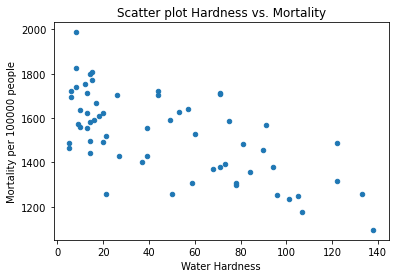

In [113]:
df.plot(kind='scatter', x='hardness', y='mortality')
plt.title('Scatter plot Hardness vs. Mortality')
plt.xlabel('Water Hardness')
plt.ylabel('Mortality per 100000 people')

Text(0.5, 1.08, 'Scatter plot and distribution matrix')

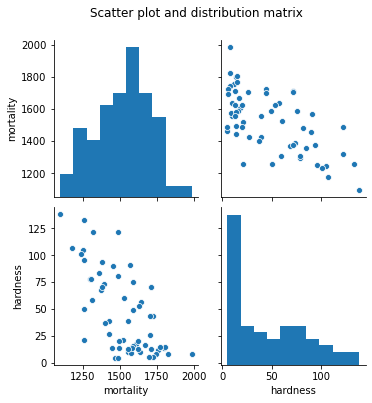

In [114]:
sns.pairplot(df).fig.suptitle('Scatter plot and distribution matrix', y = 1.08)

Mortality is heavily right-skewed. Results may be affected.

In [115]:
df['hardness_log'] = np.log(df['hardness'])
df.head()

,location,town,mortality,hardness,hardness_log
1,South,Bath,1247,105,4.653960
2,North,Birkenhead,1668,17,2.833213
3,South,Birmingham,1466,5,1.609438
4,North,Blackburn,1800,14,2.639057
5,North,Blackpool,1609,18,2.890372


In [116]:
df.describe()

,mortality,hardness,hardness_log
count,61.000000,61.000000,61.000000
mean,1524.147541,47.180328,3.446907
std,187.668754,38.093966,0.980487
min,1096.000000,5.000000,1.609438
25%,1379.000000,14.000000,2.639057
50%,1555.000000,39.000000,3.663562
75%,1668.000000,75.000000,4.317488
max,1987.000000,138.000000,4.927254


In [117]:
df.isna().sum()

location        0
town            0
mortality       0
hardness        0
hardness_log    0
dtype: int64

Text(0, 0.5, 'Mortality per 100000 people')

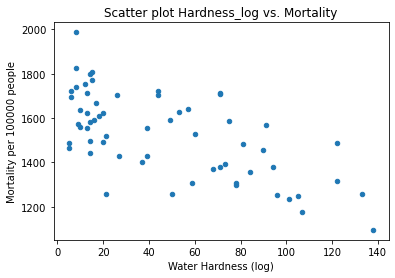

In [119]:
df.plot(kind='scatter', x='hardness', y='mortality')
plt.title('Scatter plot Hardness_log vs. Mortality')
plt.xlabel('Water Hardness (log)')
plt.ylabel('Mortality per 100000 people')

Text(0.5, 1.0, 'Hardness distribution')

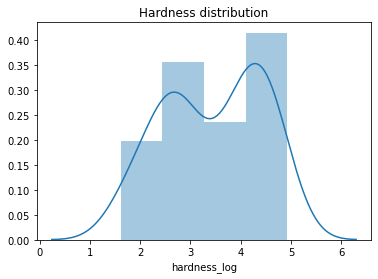

In [120]:
ax = sns.distplot(df.hardness_log)
ax.set_title('Hardness distribution')

The distribution of `hardness_log` is less skewed but is bimodal. We keep the `hardness` variable for further analysis.

In [121]:
# Pearson correlation coefficient matrix
df.corr()

,mortality,hardness,hardness_log
mortality,1.000000,-0.654849,-0.611580
hardness,-0.654849,1.000000,0.937728
hardness_log,-0.611580,0.937728,1.000000


In [122]:
# Kendall correlation coefficient matrix
df.corr(method='kendall')

,mortality,hardness,hardness_log
mortality,1.000000,-0.453753,-0.453753
hardness,-0.453753,1.000000,1.000000
hardness_log,-0.453753,1.000000,1.000000


Moderate negative correlation for Pearson coefficient and smaller negative correlation for Kendall coefficient

### Modelling

In [123]:
X = df[['hardness']]
y = df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [124]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [125]:
print(model.coef_, model.intercept_)
print(model.score(X_test, y_test))

[-3.13167087] 1668.9722977277095
0.5046490611017092


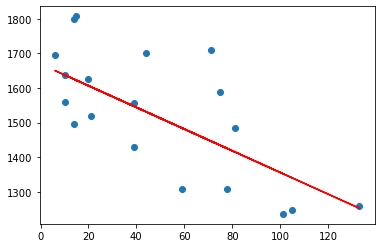

In [126]:
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

Moderate R2, only 50 percent of the variation is explained by the water harndess.

In [127]:
X_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           7.83e-06
Time:                        11:40:42   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

Text(0, 0.5, 'OLS Model Residuals')

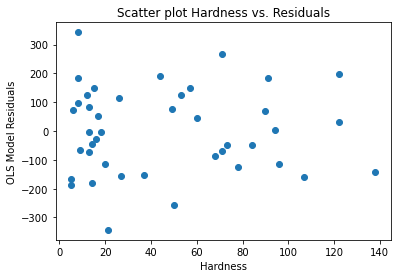

In [128]:
plt.scatter(X_const.iloc[:, 1], results.resid)
plt.title('Scatter plot Hardness vs. Residuals')
plt.xlabel('Hardness')
plt.ylabel('OLS Model Residuals')

Text(0, 0.5, 'Counts')

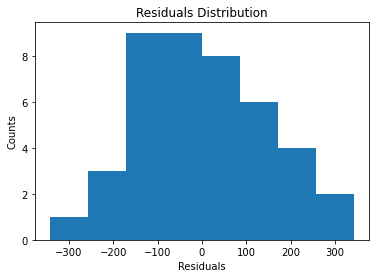

In [132]:
plt.hist(results.resid, bins = 8)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Counts')

Residuals normally distributed with no specific patterns.

## Part 2. Northern cities

### EDA

In [133]:
df_n = df[df['location'] == 'North']
df_n.head()

,location,town,mortality,hardness,hardness_log
2,North,Birkenhead,1668,17,2.833213
4,North,Blackburn,1800,14,2.639057
5,North,Blackpool,1609,18,2.890372
6,North,Bolton,1558,10,2.302585
7,North,Bootle,1807,15,2.708050


In [134]:
df_n.describe()

,mortality,hardness,hardness_log
count,35.000000,35.000000,35.000000
mean,1633.600000,30.400000,3.074398
std,136.936911,26.134494,0.831609
min,1378.000000,6.000000,1.791759
25%,1557.500000,12.500000,2.524928
50%,1637.000000,17.000000,2.833213
75%,1718.000000,44.000000,3.784190
max,1987.000000,94.000000,4.543295


In [135]:
df_n.shape

(35, 5)

Text(0, 0.5, 'Mortality per 100000 people')

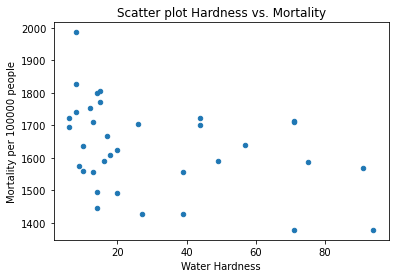

In [136]:
df_n.plot(kind='scatter', x='hardness', y='mortality')
plt.title('Scatter plot Hardness vs. Mortality')
plt.xlabel('Water Hardness')
plt.ylabel('Mortality per 100000 people')

Text(0.5, 1.08, 'Scatter plot and distribution matrix')

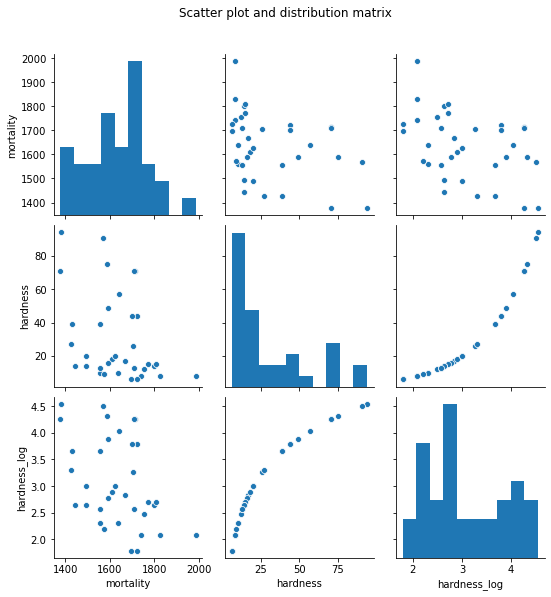

In [137]:
sns.pairplot(df_n).fig.suptitle('Scatter plot and distribution matrix', y = 1.08)

In [138]:
# Pearson correlation coefficient matrix
df_n.corr()

,mortality,hardness,hardness_log
mortality,1.000000,-0.368598,-0.412467
hardness,-0.368598,1.000000,0.949981
hardness_log,-0.412467,0.949981,1.000000


In [139]:
# Kendall correlation coefficient matrix
df_n.corr(method='kendall')

,mortality,hardness,hardness_log
mortality,1.000000,-0.283058,-0.283058
hardness,-0.283058,1.000000,1.000000
hardness_log,-0.283058,1.000000,1.000000


Small negative correlation.

### Modelling

In [140]:
X = df_n[['hardness']]
y = df_n['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [141]:
model_n = LinearRegression()
model_n.fit(X_train, y_train)

LinearRegression()

In [142]:
print(model_n.coef_, model_n.intercept_)
print(model_n.score(X_test, y_test))

[-1.97686226] 1688.150229031281
0.018885304285745863


Very small R2.

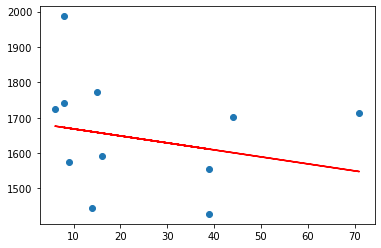

In [143]:
y_pred_n = model_n.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_n, c='r')

In [144]:
X_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Tue, 20 Oct 2020   Prob (F-statistic):             0.0316
Time:                        11:42:29   Log-Likelihood:                -147.20
No. Observations:                  24   AIC:                             298.4
Df Residuals:                      22   BIC:                             300.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1688.1502     37.137     45.457      0.0

Text(0, 0.5, 'OLS Model Residuals')

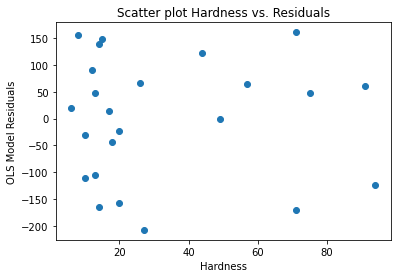

In [145]:
plt.scatter(X_const.iloc[:, 1], results.resid)
plt.title('Scatter plot Hardness vs. Residuals')
plt.xlabel('Hardness')
plt.ylabel('OLS Model Residuals')

Text(0, 0.5, 'Counts')

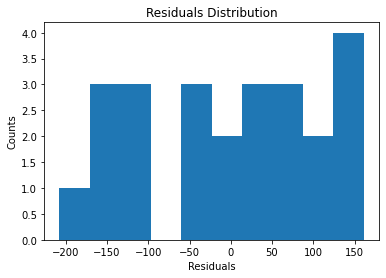

In [150]:
plt.hist(results.resid, bins = 10)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Counts')

More points are concentrated at small `hardness` values, not normally distributed.

## Part 3. Southern cities

### EDA

In [152]:
df_s = df[df['location'] == 'South']
df_s.head()

,location,town,mortality,hardness,hardness_log
1,South,Bath,1247,105,4.653960
3,South,Birmingham,1466,5,1.609438
8,South,Bournemouth,1299,78,4.356709
10,South,Brighton,1359,84,4.430817
11,South,Bristol,1392,73,4.290459


In [153]:
df_s.describe()

,mortality,hardness,hardness_log
count,26.000000,26.000000,26.000000
mean,1376.807692,69.769231,3.948362
std,140.269175,40.360682,0.954427
min,1096.000000,5.000000,1.609438
25%,1259.250000,40.250000,3.686194
50%,1364.000000,75.500000,4.323584
75%,1485.750000,99.750000,4.602427
max,1627.000000,138.000000,4.927254


In [154]:
df_s.shape

(26, 5)

Text(0, 0.5, 'Mortality per 100000 people')

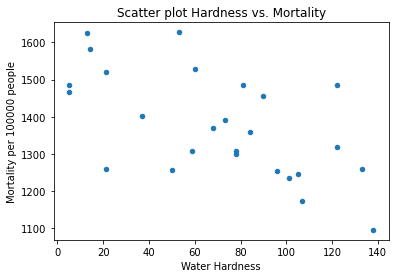

In [155]:
df_s.plot(kind='scatter', x='hardness', y='mortality')
plt.title('Scatter plot Hardness vs. Mortality')
plt.xlabel('Water Hardness')
plt.ylabel('Mortality per 100000 people')

Text(0.5, 1.08, 'Scatter plot and distribution matrix')

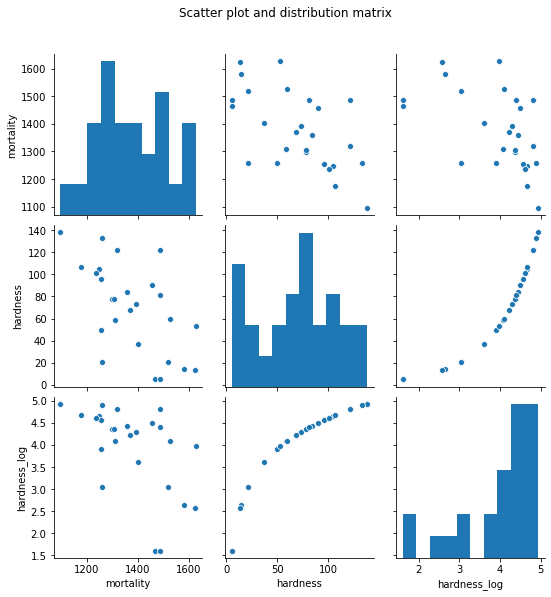

In [156]:
sns.pairplot(df_s).fig.suptitle('Scatter plot and distribution matrix', y = 1.08)

In [157]:
# Pearson correlation coefficient matrix
df_n.corr()

,mortality,hardness,hardness_log
mortality,1.000000,-0.368598,-0.412467
hardness,-0.368598,1.000000,0.949981
hardness_log,-0.412467,0.949981,1.000000


In [158]:
# Kendall correlation coefficient matrix
df_n.corr(method='kendall')

,mortality,hardness,hardness_log
mortality,1.000000,-0.283058,-0.283058
hardness,-0.283058,1.000000,1.000000
hardness_log,-0.283058,1.000000,1.000000


Small negative correlation.

### Modelling

In [159]:
X = df_s[['hardness']]
y = df_s['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [160]:
model_s = LinearRegression()
model_s.fit(X_train, y_train)

LinearRegression()

In [161]:
print(model_s.coef_, model_s.intercept_)
print(model_s.score(X_test, y_test))

[-3.51342921] 1640.2204603423374
-2.551922301235205


Negative R2?

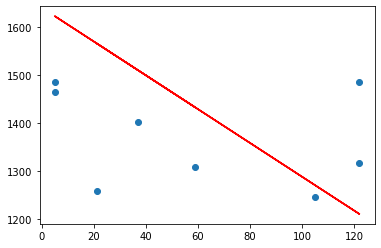

In [162]:
y_pred_s = model_s.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_s, c='r')

In [163]:
X_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           7.30e-05
Time:                        11:44:54   Log-Likelihood:                -106.97
No. Observations:                  18   AIC:                             217.9
Df Residuals:                      16   BIC:                             219.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1640.2205     54.471     30.112      0.0

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0, 0.5, 'OLS Model Residuals')

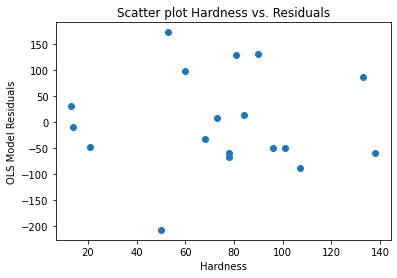

In [164]:
plt.scatter(X_const.iloc[:, 1], results.resid)
plt.title('Scatter plot Hardness vs. Residuals')
plt.xlabel('Hardness')
plt.ylabel('OLS Model Residuals')

Text(0, 0.5, 'Counts')

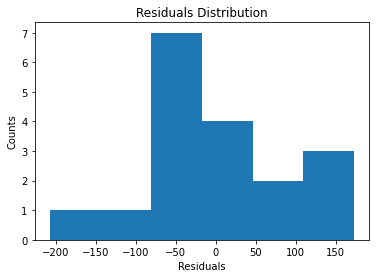

In [167]:
plt.hist(results.resid, bins = 6)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Counts')

Residuals with no specific patterns, normally distributed.

## Conclusion
    
Moderate to small correlation. Small R2 for entire dataset and Northern cities. Negative R2 for Southern cities (?). Few data points for modelling. Very different R2 values from sklearn and statsmodels tools.